In [11]:
import numpy as np
import pandas as pd
import random
from time import time
import matplotlib.pyplot as plt


## Bubble Sort
Bubble sort is a simple sorting algorithm. This sorting algorithm is comparison-based algorithm in which each pair of adjacent elements is compared and the elements are swapped if they are not in order. This algorithm is not suitable for large data sets as its average and worst case complexity are of Ο(n2) where n is the number of items.

Bubble sort is based on the idea of repeatedly comparing pairs of adjacent elements and then swapping their positions if they exist in the wrong order.

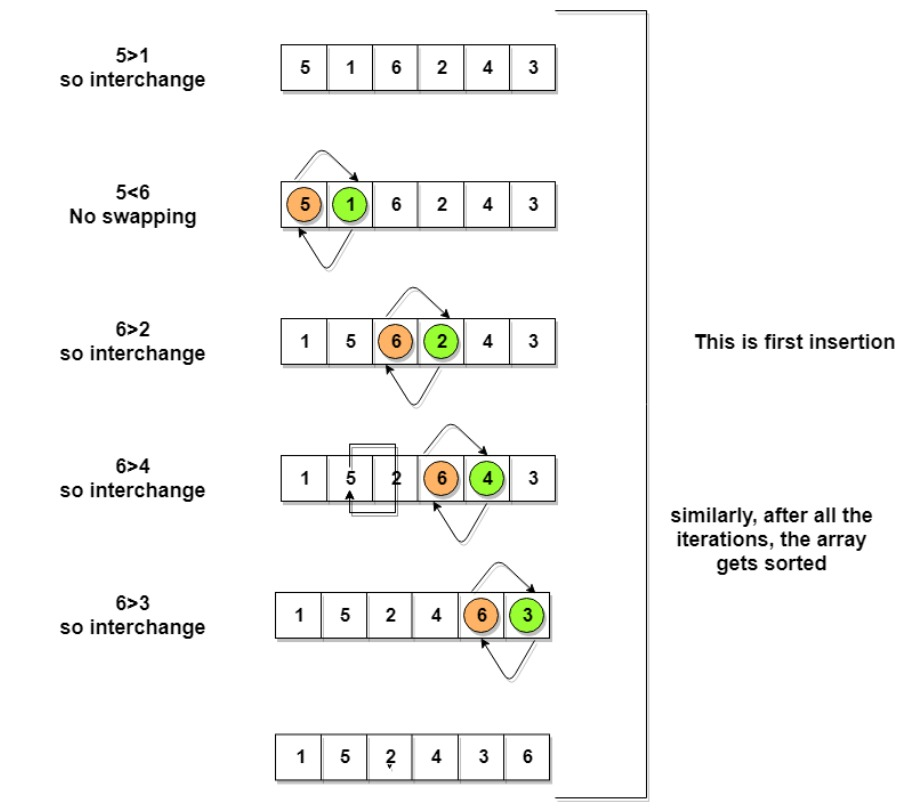

## Algorithms

$begin \ BubbleSort(A[0...n-1])\\ \ \ \ \ \ \ \ for \ i\leftarrow \ 0 \ to \  n-2 \ do:\\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ min\leftarrow \ i\\\ \ \ \ \ \ \ \ \ \ \ \ \ \ for  \ j\leftarrow i+1 \ to \ n-1 \ do: \\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ if A[j]<A[min] \ \ min\leftarrow j \\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ swap \ \ A[i] \ and \ A[min]$
         

### WorstCase 
$\sum_{i=2}^{n} * \sum_{j=1}^{i-1} * 1$

- Upper bound = i-1
- lower bound = 1

- Lenght = (i -1) - 1 + 1 (Amount of time 1 is repeated)



$\sum_{i=2}^{n} (i -1) - (1) + 1 $




$\sum_{i=2}^{n} (i -1) $


- Final value = n -1
- Using Gauss Formula
$\frac{(n(n+1)}{2}$

$\frac{((n-1)((n-1)+1)}{2}$ = $\frac{(n-1) n}{2}$

$\frac{(n-1) n}{2}$ = Amount of swaps in worst case

As expected, the algorithm's complexity is $O\big(n^2\big)$

### Average Case

- Expected value of a swap
- E[ X ] = sum possibilities * chance of possibility

$\sum_{i=2}^{n} *\sum_{j=1}^{i-1}* E[ X ] $

- Swap = 1
- No swap = 0

E[ X ] = (0 + 1) * $\frac{1}{2}$ = $\frac{1}{2}$

$\sum_{i=2}^{n} *\sum_{j=1}^{i-1}* \frac{1}{2} $

$\frac{1}{2} \sum_{i=2}^{n} *\sum_{j=1}^{i-1} * 1$

$\frac{1}{2} * \frac{(n-1) n}{2}$ = $\frac{(n-1) n}{4}$

$\frac{(n-1) n}{4}$ = Amount of swaps in Avg case

As expected, the algorithm's complexity is $O\big(n^2\big)$

### Best Case

Since no swapping occurred while all the elements are already sorted we can see that for n elements this algorithms best case will take only n-1 comparisons, n-1 = $O\big(n\big)$

In [7]:
# Funciton to generate random arrays
def rand_arr():
    
    #State 3 sizes to make it more random, but controlled.
    short = [random.randint(0, 300) for x in range(random.randint(500,750))]
    medium = [random.randint(0, 3000) for x in range(random.randint(750,1000))]
    large = [random.randint(0, 30000) for x in range(random.randint(1000,3000))]
    arrays = [short, medium, large]
    #Return 3 different arrays according to the size
    return arrays

In [15]:
def bubble_sort(A):
    start = time()
    n = len(A)
    for i in range(0,n):  #instead of n-2
        
        for j in range(0, n-1-i): ## instead of n-2-i 
            if A[j+1] < A[j]:
                swap = A[j]
                A[j] = A[j+1]
                A[j+1] = swap
    finish = time()
    return [A, finish-start]

In [16]:
values = []
values_merge = []

for x in range(0,5):   
    # getting the arrays
    all_arr = rand_arr()
    tiny = all_arr[0]
    medium = all_arr[1]
    large = all_arr[2]
    #INSERTION
    tiny_times = bubble_sort(tiny)
    values.append([tiny_times[1],len(tiny_times[0])])
    medium_times = bubble_sort(medium)
    values.append([medium_times[1], len(medium_times[0])])
    large_times = bubble_sort(large)
    values.append([large_times[1], len(large_times[0])])
values.sort()


In [20]:
serie_val = pd.Series([val[1] for val in values], name = 'Size of the sample')
serie_val2 = pd.Series([val[0] for val in values], name = 'Time_Bubble')
table = pd.concat([serie_val, serie_val2], axis=1)
table = table.set_index(table['Size of the sample'])
display("Mean of ecah column", table.mean())
table = table.drop(columns = ['Size of the sample'], axis=1)

'Mean of ecah column'

Size of the sample    1090.533333
Time_Bubble              0.328434
dtype: float64

In [34]:
plot_arreglado = []
arreglado = [val for val in range(0,1750)]
arreg_bubble = bubble_sort(arreglado)
plot_arreglado.append([arreg_bubble[1], len(arreg_bubble[0])])
plot_arreglado

[[0.30619311332702637, 1750]]

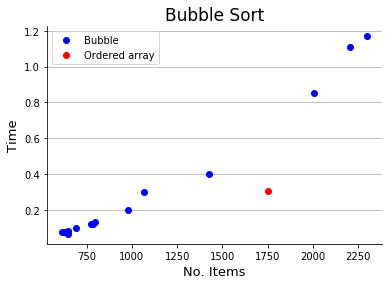

In [37]:
ax = plt.axes()

plt.plot([val[1] for val in values], [val[0] for val in values],"bo", label = 'Bubble')
plt.plot(plot_arreglado[0][1],plot_arreglado[0][0] , "ro", label = 'Ordered array')
plt.title('Bubble Sort', fontsize = 17)
plt.ylabel('Time', fontsize = 13)
plt.xlabel('No. Items', fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.grid(axis = 'y')


#### Book Used for the code:
* Introduction to the design and Analysis of Algorithms, 